<a href="https://colab.research.google.com/github/fatema373/Colorization_model/blob/main/GraytoRGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shiekhburhan/face-mask-dataset')

100%|██████████| 2.33G/2.33G [01:23<00:00, 30.2MB/s]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import keras 
import tensorflow as tf
from keras import layers
import PIL
import cv2
import os
from keras.layers import add, ReLU,Input,Layer,Conv2D , Dropout, multiply,MaxPool2D, LeakyReLU,Concatenate,UpSampling2D,Conv2DTranspose,BatchNormalization,MaxPooling2D
from keras.models import Model, load_model
# import Path
from PIL import Image
from IPython.core.display import Path
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
main_DIR='/content/face-mask-dataset/FMD_DATASET/incorrect_mask/mc'
# dir=Path(main_DIR)

In [ ]:
def Read_data(path):
    gray_img = list()
    RGB_img = list()
    images_path = Path(path).glob('*') #'*/.jpg'
    # print(type(images_path[0]))
    for path in images_path:
      # grayscale = Image.open(path).convert('L')
      RGB = Image.open(path)
      gray = Image.open(path).convert('L')
      RGB = RGB.resize(size=(128,128))
      gray = gray.resize(size=(128,128))
      RGB=np.array(RGB)
      gray=np.array(gray)
      gray = gray.reshape(gray.shape[0],gray.shape[1],1)
      RGB_img.append(RGB)
      gray_img.append(gray)
    return np.array(gray_img)/255.0,np.array(RGB_img)/255.0
#     files_img = Path(path_image).glob('*')


In [ ]:
img_gray,img_RGB = Read_data(main_DIR)

In [ ]:
img_gray.shape

(2500, 128, 128, 1)

In [ ]:
img_RGB.shape

(2500, 128, 128, 3)

In [ ]:
# Encoder
input_layer = Input(shape=(128,128,1))
# 128*128*1
encoding_conv_layer1 = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(input_layer)
# 128*128*32
encoding_conv_layer1 = MaxPooling2D((2,2),padding = 'same')(encoding_conv_layer1)
# 64*64*32
encoding_conv_layer2 = Conv2D(64,(3,3),activation = 'relu',padding = 'same')(encoding_conv_layer1)
# 64*64*64
encoding_conv_layer2 = MaxPooling2D((2,2),padding = 'same')(encoding_conv_layer2)
# 32*32*64
encoding_conv_layer3 = Conv2D(128,(3,3),activation= 'relu',padding='same')(encoding_conv_layer2)
# 32*32*128
encoding_conv_layer3 = MaxPooling2D((2,2) , padding = 'same')(encoding_conv_layer3)
# 16*16*128
encoding_conv_layer4 = Conv2D(256 , (3,3),activation = 'relu',padding = 'same')(encoding_conv_layer3)
# 16*16*256
latent_vector = MaxPooling2D((2,2),padding = 'same')(encoding_conv_layer4)
# 8*8*256  //OUTPUT OF THE ENCODER PRT

In [ ]:
#decoder
# 8*8*256
decoding_conv_layer1 = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(latent_vector)
# 8*8*128
decoding_conv_layer1 = UpSampling2D((2,2))(decoding_conv_layer1)
# 16*16*128
decoding_conv_layer2 = Conv2D(64,(3,3),activation ='relu',padding = 'same')(decoding_conv_layer1)
# 16*16*64
decoding_conv_layer2 = UpSampling2D((2,2))(decoding_conv_layer2)
# 32*32*64
decoding_conv_layer3 = Conv2D(32,(3,3),activation = 'relu',padding ='same')(decoding_conv_layer2)
# 32*32*32
decoding_conv_layer3 = UpSampling2D((2,2))(decoding_conv_layer3)
# 64*64*32
decoding_conv_layer4 = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(decoding_conv_layer3)
# 64*64*8
decoding_conv_layer4 = UpSampling2D((2,2))(decoding_conv_layer4)
# 128*128*8
output_layer = Conv2D(3,(3,3),activation = 'sigmoid',padding = 'same')(decoding_conv_layer4)
# 128*128*3 //OUTPUT OF THE DECODER PRT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(img_gray,img_RGB,test_size=0.2)

In [ ]:
model = Model(input_layer , output_layer)
model.compile(optimizer = 'sgd' , loss = 'mean_squared_error')


In [ ]:
model.fit(X_train,Y_train, batch_size = 32,
        epochs = 2000)

Epoch 1/2000
63/63 [==============================] - 2s 36ms/step - loss: 0.0156
Epoch 2/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0157
Epoch 3/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0156
Epoch 4/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0157
Epoch 5/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0157
Epoch 6/2000
63/63 [==============================] - 2s 32ms/step - loss: 0.0156
Epoch 7/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0156
Epoch 8/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0156
Epoch 9/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0156
Epoch 10/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0156
Epoch 11/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0157
Epoch 12/2000
63/63 [==============================] - 2s 33ms/step - loss: 0.0156
Epoch 13/2000

In [ ]:
model.save('cnn_coloring_2.h5')

In [ ]:
decoded_image = model.predict(X_test)

16/16 [==============================] - 0s 11ms/step


In [ ]:
decoder_image=model.predict(X_test)
print(np.shape(decoder_image))

16/16 [==============================] - 0s 11ms/step
(500, 128, 128, 3)


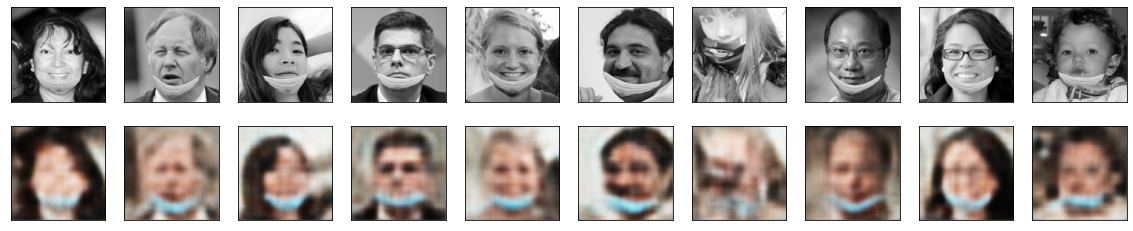

In [ ]:
plt.figure(figsize = (20,4))

for i in range(10):
    #orignal
    subplot = plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(128,128))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    #reconstructed image
    subplot = plt.subplot(2,10,i+11)
    plt.imshow(decoder_image[i].reshape(128,128,3))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
plt.show()